<a href="https://colab.research.google.com/github/TravisJRCain/Working-With-PyBaseball/blob/main/Working_With_PyBaseball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pybaseball

  Created wheel for pybaseball: filename=pybaseball-1.0.8-cp36-none-any.whl size=36008 sha256=03353108ca39db552e26455c051458d412d15cd69d4f1b42c1c7bf904af538f0
  Stored in directory: /root/.cache/pip/wheels/d5/7b/fb/b1f8a38eb135628a747627977fd18d13ce2c210cffa08ee5a5
Successfully built pybaseball


In [ ]:
from pybaseball import statcast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = statcast('2017-05-01', '2017-06-30')
print(data.shape)

This is a large query, it may take a moment to complete
Completed sub-query from 2017-05-01 to 2017-05-06
Completed sub-query from 2017-05-07 to 2017-05-12
Completed sub-query from 2017-05-13 to 2017-05-18
Completed sub-query from 2017-05-19 to 2017-05-24
Completed sub-query from 2017-05-25 to 2017-05-30
Completed sub-query from 2017-05-31 to 2017-06-05
Completed sub-query from 2017-06-06 to 2017-06-11
Completed sub-query from 2017-06-12 to 2017-06-17
Completed sub-query from 2017-06-18 to 2017-06-23
Completed sub-query from 2017-06-24 to 2017-06-29
Completed sub-query from 2017-06-30 to 2017-06-30
(247710, 90)


In [ ]:
data2 = data.dropna(subset=['launch_angle', 'launch_speed', 'estimated_ba_using_speedangle'])

In [ ]:
data2.shape

(43835, 90)

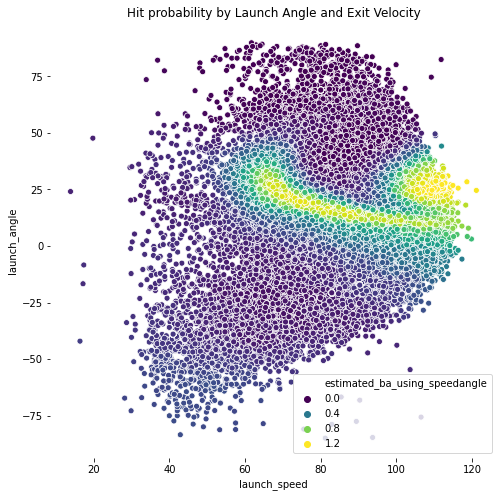

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.despine(fig, left=True, bottom=True)
sns.scatterplot(x="launch_speed", y="launch_angle",
                hue="estimated_ba_using_speedangle", 
                palette='viridis', 
                data=data2, ax=ax)
ax.set_title("Hit probability by Launch Angle and Exit Velocity");

In [ ]:

data2['hr'] = data2.events=='home_run'

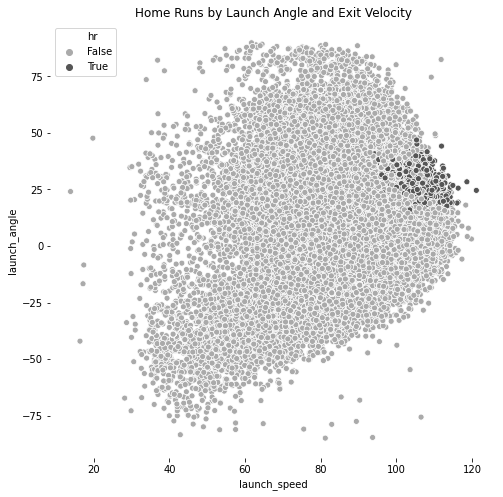

In [ ]:

fig, ax = plt.subplots(figsize=(8, 8))
sns.despine(fig, left=True, bottom=True)
sns.scatterplot(x="launch_speed", y="launch_angle",
                hue="hr", 
                palette='binary', 
                data=data2, ax=ax)
ax.set_title("Home Runs by Launch Angle and Exit Velocity");

In [ ]:
from pybaseball import pitching_stats
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pitching_stats(2014, 2016)
data.head()

,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,...,CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
211,2015.0,Clayton Kershaw,Dodgers,27.0,16.0,7.0,2.13,8.6,33.0,33.0,4.0,3.0,0.0,0.0,232.2,890.0,163.0,62.0,55.0,15.0,42.0,1.0,5.0,9.0,3.0,301.0,262.0,148.0,114.0,14.0,1089.0,2303.0,3392.0,115.0,16.0,18.0,4.0,11.64,1.62,7.17,...,NaN,-9.6,11.7,NaN,NaN,NaN,NaN,NaN,3.9,3.4,-1.2,NaN,17.3,26.3,NaN,NaN,NaN,NaN,NaN,16.5,0.2,-7.73,NaN,2.81,1.45,NaN,NaN,NaN,NaN,NaN,1.76,22.85,0.365,0.665,0.511,0.478,0.811,0.689,0.487,23.4
153,2014.0,Clayton Kershaw,Dodgers,26.0,21.0,3.0,1.77,7.9,27.0,27.0,6.0,2.0,0.0,0.0,198.1,749.0,139.0,42.0,39.0,9.0,31.0,0.0,2.0,7.0,2.0,239.0,243.0,137.0,89.0,19.0,835.0,1887.0,2722.0,124.0,12.0,8.0,1.0,10.85,1.41,7.71,...,-8.6,-8.8,11.5,NaN,NaN,NaN,NaN,9.9,4.4,NaN,-1.9,0.1,7.9,19.9,NaN,NaN,NaN,NaN,0.6,19.9,NaN,-6.39,5.4,2.11,1.38,NaN,NaN,NaN,NaN,9.27,2.62,NaN,0.371,0.670,0.525,0.536,0.831,0.730,0.515,23.7
290,2014.0,Corey Kluber,Indians,28.0,18.0,9.0,2.44,7.2,34.0,34.0,3.0,1.0,0.0,0.0,235.2,951.0,207.0,72.0,64.0,14.0,51.0,3.0,6.0,3.0,0.0,269.0,296.0,189.0,132.0,21.0,1136.0,2364.0,3500.0,115.0,15.0,8.0,1.0,10.27,1.95,5.27,...,NaN,NaN,9.0,2.4,NaN,NaN,NaN,6.5,-2.5,NaN,-1.1,NaN,NaN,-1.3,14.7,NaN,NaN,NaN,-7.5,21.5,NaN,-0.86,NaN,NaN,-0.96,1.50,NaN,NaN,NaN,-0.44,3.92,NaN,0.339,0.598,0.470,0.485,0.886,0.744,0.507,24.6
152,2015.0,Jake Arrieta,Cubs,29.0,22.0,6.0,1.77,7.0,33.0,33.0,4.0,3.0,0.0,0.0,229.0,870.0,150.0,52.0,45.0,10.0,48.0,2.0,6.0,6.0,0.0,236.0,318.0,129.0,119.0,12.0,1202.0,2236.0,3438.0,118.0,22.0,14.0,3.0,9.28,1.89,4.92,...,NaN,-8.9,9.1,NaN,NaN,NaN,NaN,7.6,2.8,NaN,3.3,NaN,7.6,-0.6,NaN,NaN,NaN,NaN,25.9,24.2,NaN,2.08,NaN,1.43,-0.23,NaN,NaN,NaN,NaN,1.75,2.42,NaN,0.330,0.618,0.469,0.595,0.856,0.762,0.484,23.3
291,2015.0,David Price,- - -,29.0,18.0,5.0,2.45,6.7,32.0,32.0,3.0,1.0,0.0,0.0,220.1,888.0,190.0,70.0,60.0,17.0,47.0,2.0,3.0,4.0,0.0,225.0,243.0,219.0,139.0,24.0,1066.0,2322.0,3388.0,137.0,17.0,12.0,3.0,9.19,1.92,4.79,...,NaN,-0.9,10.0,5.2,NaN,NaN,NaN,8.6,NaN,-10.6,12.3,NaN,1.7,5.9,-0.2,NaN,NaN,NaN,13.8,NaN,0.0,1.61,NaN,0.64,0.60,-0.03,NaN,NaN,NaN,1.74,NaN,-3.50,0.333,0.655,0.507,0.627,0.824,0.765,0.541,26.3


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
data.head(10)

,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,Dollars,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB%,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (pfx),FT% (pfx),FC% (pfx),FS% (pfx),FO% (pfx),SI% (pfx),SL% (pfx),CU% (pfx),KC% (pfx),EP% (pfx),CH% (pfx),SC% (pfx),KN% (pfx),UN% (pfx),vFA (pfx),vFT (pfx),vFC (pfx),vFS (pfx),vFO (pfx),vSI (pfx),vSL (pfx),vCU (pfx),vKC (pfx),vEP (pfx),vCH (pfx),vSC (pfx),vKN (pfx),FA-X (pfx),FT-X (pfx),FC-X (pfx),FS-X (pfx),FO-X (pfx),SI-X (pfx),SL-X (pfx),CU-X (pfx),KC-X (pfx),EP-X (pfx),CH-X (pfx),SC-X (pfx),KN-X (pfx),FA-Z (pfx),FT-Z (pfx),FC-Z (pfx),FS-Z (pfx),FO-Z (pfx),SI-Z (pfx),SL-Z (pfx),CU-Z (pfx),KC-Z (pfx),EP-Z (pfx),CH-Z (pfx),SC-Z (pfx),KN-Z (pfx),wFA (pfx),wFT (pfx),wFC (pfx),wFS (pfx),wFO (pfx),wSI (pfx),wSL (pfx),wCU (pfx),wKC (pfx),wEP (pfx),wCH (pfx),wSC (pfx),wKN (pfx),wFA/C (pfx),wFT/C (pfx),wFC/C (pfx),wFS/C (pfx),wFO/C (pfx),wSI/C (pfx),wSL/C (pfx),wCU/C (pfx),wKC/C (pfx),wEP/C (pfx),wCH/C (pfx),wSC/C (pfx),wKN/C (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
211,2015.0,Clayton Kershaw,Dodgers,27.0,16.0,7.0,2.13,8.6,33.0,33.0,4.0,3.0,0.0,0.0,232.2,890.0,163.0,62.0,55.0,15.0,42.0,1.0,5.0,9.0,3.0,301.0,262.0,148.0,114.0,14.0,1089.0,2303.0,3392.0,115.0,16.0,18.0,4.0,11.64,1.62,7.17,6.31,0.58,0.193,0.88,0.281,0.783,1.99,1.77,0.218,0.500,0.095,0.101,0.061,0.222,70.8,232.2,NaN,NaN,70.8,$68.4,2.28,2.09,4.98,-11.32,16.30,46.05,5.21,0.96,0.95,0.88,1.14,29.0,5.67,-0.47,0.539,93.6,0.275,88.1,NaN,NaN,0.182,73.6,0.004,87.5,NaN,NaN,NaN,NaN,0.001,NaN,24.7,15.7,NaN,16.5,-1.2,NaN,NaN,1.35,1.69,NaN,2.68,-7.73,NaN,NaN,0.345,0.687,0.512,0.513,0.782,0.689,0.489,0.682,0.159,0.0,0.0,0.0,57.0,53.0,54.0,0.338,0.047,2.24,4.45,0.14,0.539,NaN,NaN,NaN,NaN,NaN,0.273,0.182,NaN,NaN,0.005,NaN,NaN,NaN,93.6,NaN,NaN,NaN,NaN,NaN,88.0,73.5,NaN,NaN,88.1,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,-2.2,-1.1,NaN,NaN,5.5,NaN,NaN,11.1,NaN,NaN,NaN,NaN,NaN,3.4,-10.2,NaN,NaN,8.6,NaN,NaN,24.4,NaN,NaN,NaN,NaN,NaN,16.3,17.2,NaN,NaN,-0.5,NaN,NaN,1.34,NaN,NaN,NaN,NaN,NaN,1.77,2.79,NaN,NaN,-2.60,NaN,NaN,0.354,0.672,0.512,0.469,0.806,0.689,0.497,22.5,7.9,1.0,-1.6,-0.6,27 - 27,0.291,0.402,0.380,0.218,0.199,0.548,0.253,2.00,0.402,0.004,NaN,0.182,0.538,NaN,NaN,NaN,NaN,NaN,0.276,0.000,88.4,NaN,74.1,94.3,NaN,NaN,NaN,NaN,NaN,88.6,72.1,6.0,NaN,-0.9,1.1,NaN,NaN,NaN,NaN,NaN,-2.0,4.6,9.5,NaN,-9.6,11.7,NaN,NaN,NaN,NaN,NaN,3.9,3.4,-1.2,NaN,17.3,26.3,NaN,NaN,NaN,NaN,NaN,16.5,0.2,-7.73,NaN,2.81,1.45,NaN,NaN,NaN,NaN,NaN,1.76,22.85,0.365,0.665,0.511,0.478,0.811,0.689,0.487,23.4
153,2014.0,Clayton Kershaw,Dodgers,26.0,21.0,3.0,1.77,7.9,27.0,27.0,6.0,2.0,0.0,0.0,198.1,749.0,139.0,42.0,39.0,9.0,31.0,0.0,2.0,7.0,2.0

In [ ]:
data.loc[data['Name'] == 'Clayton Kershaw']

,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,Dollars,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB%,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (pfx),FT% (pfx),FC% (pfx),FS% (pfx),FO% (pfx),SI% (pfx),SL% (pfx),CU% (pfx),KC% (pfx),EP% (pfx),CH% (pfx),SC% (pfx),KN% (pfx),UN% (pfx),vFA (pfx),vFT (pfx),vFC (pfx),vFS (pfx),vFO (pfx),vSI (pfx),vSL (pfx),vCU (pfx),vKC (pfx),vEP (pfx),vCH (pfx),vSC (pfx),vKN (pfx),FA-X (pfx),FT-X (pfx),FC-X (pfx),FS-X (pfx),FO-X (pfx),SI-X (pfx),SL-X (pfx),CU-X (pfx),KC-X (pfx),EP-X (pfx),CH-X (pfx),SC-X (pfx),KN-X (pfx),FA-Z (pfx),FT-Z (pfx),FC-Z (pfx),FS-Z (pfx),FO-Z (pfx),SI-Z (pfx),SL-Z (pfx),CU-Z (pfx),KC-Z (pfx),EP-Z (pfx),CH-Z (pfx),SC-Z (pfx),KN-Z (pfx),wFA (pfx),wFT (pfx),wFC (pfx),wFS (pfx),wFO (pfx),wSI (pfx),wSL (pfx),wCU (pfx),wKC (pfx),wEP (pfx),wCH (pfx),wSC (pfx),wKN (pfx),wFA/C (pfx),wFT/C (pfx),wFC/C (pfx),wFS/C (pfx),wFO/C (pfx),wSI/C (pfx),wSL/C (pfx),wCU/C (pfx),wKC/C (pfx),wEP/C (pfx),wCH/C (pfx),wSC/C (pfx),wKN/C (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
211,2015.0,Clayton Kershaw,Dodgers,27.0,16.0,7.0,2.13,8.6,33.0,33.0,4.0,3.0,0.0,0.0,232.2,890.0,163.0,62.0,55.0,15.0,42.0,1.0,5.0,9.0,3.0,301.0,262.0,148.0,114.0,14.0,1089.0,2303.0,3392.0,115.0,16.0,18.0,4.0,11.64,1.62,7.17,6.31,0.58,0.193,0.88,0.281,0.783,1.99,1.77,0.218,0.500,0.095,0.101,0.061,0.222,70.8,232.2,NaN,NaN,70.8,$68.4,2.28,2.09,4.98,-11.32,16.30,46.05,5.21,0.96,0.95,0.88,1.14,29.0,5.67,-0.47,0.539,93.6,0.275,88.1,NaN,NaN,0.182,73.6,0.004,87.5,NaN,NaN,NaN,NaN,0.001,NaN,24.7,15.7,NaN,16.5,-1.2,NaN,NaN,1.35,1.69,NaN,2.68,-7.73,NaN,NaN,0.345,0.687,0.512,0.513,0.782,0.689,0.489,0.682,0.159,0.0,0.0,0.0,57.0,53.0,54.0,0.338,0.047,2.24,4.45,0.14,0.539,NaN,NaN,NaN,NaN,NaN,0.273,0.182,NaN,NaN,0.005,NaN,NaN,NaN,93.6,NaN,NaN,NaN,NaN,NaN,88.0,73.5,NaN,NaN,88.1,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,-2.2,-1.1,NaN,NaN,5.5,NaN,NaN,11.1,NaN,NaN,NaN,NaN,NaN,3.4,-10.2,NaN,NaN,8.6,NaN,NaN,24.4,NaN,NaN,NaN,NaN,NaN,16.3,17.2,NaN,NaN,-0.5,NaN,NaN,1.34,NaN,NaN,NaN,NaN,NaN,1.77,2.79,NaN,NaN,-2.60,NaN,NaN,0.354,0.672,0.512,0.469,0.806,0.689,0.497,22.5,7.9,1.0,-1.6,-0.6,27 - 27,0.291,0.402,0.380,0.218,0.199,0.548,0.253,2.00,0.402,0.004,NaN,0.182,0.538,NaN,NaN,NaN,NaN,NaN,0.276,0.000,88.4,NaN,74.1,94.3,NaN,NaN,NaN,NaN,NaN,88.6,72.1,6.0,NaN,-0.9,1.1,NaN,NaN,NaN,NaN,NaN,-2.0,4.6,9.5,NaN,-9.6,11.7,NaN,NaN,NaN,NaN,NaN,3.9,3.4,-1.2,NaN,17.3,26.3,NaN,NaN,NaN,NaN,NaN,16.5,0.2,-7.73,NaN,2.81,1.45,NaN,NaN,NaN,NaN,NaN,1.76,22.85,0.365,0.665,0.511,0.478,0.811,0.689,0.487,23.4
153,2014.0,Clayton Kershaw,Dodgers,26.0,21.0,3.0,1.77,7.9,27.0,27.0,6.0,2.0,0.0,0.0,198.1,749.0,139.0,42.0,39.0,9.0,31.0,0.0,2.0,7.0,2.0

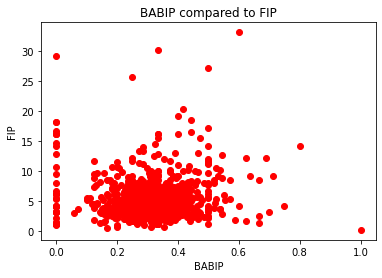

In [ ]:
# Hypothesis = Higher FIP = Higher O-Swing%

plt.scatter(data['BABIP'], data['FIP'], color='r')
plt.xlabel('BABIP')
plt.ylabel('FIP')
# plt.yticks([0,5,10])
plt.title('BABIP compared to FIP');

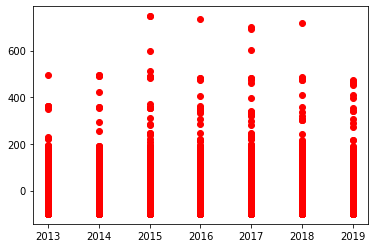

In [ ]:
# wRC+ scatterplot

plt.scatter(df2['Season'], df2['wRC+'], color='r')

In [ ]:
# P-Value
from scipy import stats

observed = pd.crosstab(data['BABIP'], data['FIP'])
observed
observed = observed.values
stats.chi2_contingency(observed)

(185823.6054191982,
 1.0743854620098798e-91,
 173602,
 array([[0.01679104, 0.01679104, 0.01679104, ..., 0.01679104, 0.01679104,
         0.01679104],
        [0.00046642, 0.00046642, 0.00046642, ..., 0.00046642, 0.00046642,
         0.00046642],
        [0.00046642, 0.00046642, 0.00046642, ..., 0.00046642, 0.00046642,
         0.00046642],
        ...,
        [0.00046642, 0.00046642, 0.00046642, ..., 0.00046642, 0.00046642,
         0.00046642],
        [0.00046642, 0.00046642, 0.00046642, ..., 0.00046642, 0.00046642,
         0.00046642],
        [0.00046642, 0.00046642, 0.00046642, ..., 0.00046642, 0.00046642,
         0.00046642]]))

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(observed)
print(p)

1.0743854620098798e-91


In [ ]:
# T-Test method
stats.ttest_ind(data['Hard%'], data['xFIP'])

Ttest_indResult(statistic=-132.2455501570551, pvalue=0.0)

In [ ]:
def confidence_interval(df, confidence=0.95):
  data = np.array(df)
  mean = np.mean(df)
  n = len(df)
  s = df.std(ddof=1)
  stderr = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*stderr
  return (mean, mean - margin_of_error, mean + margin_of_error)

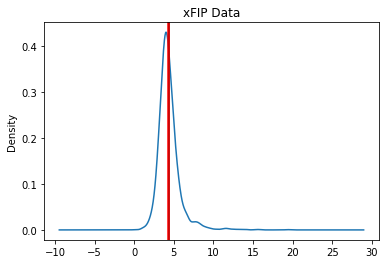

In [ ]:
import matplotlib.pyplot as plt

xFIP_data = data['xFIP']

CI = confidence_interval(xFIP_data)

xFIP_data.plot.density()
plt.title('xFIP Data')
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[0], color='black')
plt.axvline(x=CI[2], color='red')
plt.show();

In [ ]:
#### HITTING STATS ####

from pybaseball import batting_stats

df2 = batting_stats(2013, 2019)

df2.head()

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (pfx),FT% (pfx),FC% (pfx),FS% (pfx),FO% (pfx),SI% (pfx),SL% (pfx),CU% (pfx),KC% (pfx),EP% (pfx),CH% (pfx),SC% (pfx),KN% (pfx),UN% (pfx),vFA (pfx),vFT (pfx),vFC (pfx),vFS (pfx),vFO (pfx),vSI (pfx),vSL (pfx),vCU (pfx),vKC (pfx),vEP (pfx),vCH (pfx),vSC (pfx),vKN (pfx),FA-X (pfx),FT-X (pfx),FC-X (pfx),FS-X (pfx),FO-X (pfx),SI-X (pfx),SL-X (pfx),CU-X (pfx),KC-X (pfx),EP-X (pfx),CH-X (pfx),SC-X (pfx),KN-X (pfx),FA-Z (pfx),FT-Z (pfx),FC-Z (pfx),FS-Z (pfx),FO-Z (pfx),SI-Z (pfx),SL-Z (pfx),CU-Z (pfx),KC-Z (pfx),EP-Z (pfx),CH-Z (pfx),SC-Z (pfx),KN-Z (pfx),wFA (pfx),wFT (pfx),wFC (pfx),wFS (pfx),wFO (pfx),wSI (pfx),wSL (pfx),wCU (pfx),wKC (pfx),wEP (pfx),wCH (pfx),wSC (pfx),wKN (pfx),wFA/C (pfx),wFT/C (pfx),wFC/C (pfx),wFS/C (pfx),wFO/C (pfx),wSI/C (pfx),wSL/C (pfx),wCU/C (pfx),wKC/C (pfx),wEP/C (pfx),wCH/C (pfx),wSC/C (pfx),wKN/C (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
131,2018.0,Mookie Betts,Red Sox,25.0,136.0,520.0,614.0,180.0,96.0,47.0,5.0,32.0,129.0,80.0,81.0,8.0,91.0,8.0,5.0,0.0,5.0,30.0,6.0,0.346,147.0,195.0,92.0,18.0,2582.0,1095.0,1487.0,14.0,0.0,0.0,0.132,0.148,0.89,0.438,0.640,1.078,0.294,0.368,0.0075,0.212,0.339,0.449,0.092,0.164,0.095,0.0,0.449,67.2,139.0,62.3,16.8,18.4,-5.3,101.1,10.4,$83.2,7.0,185.0,5.77,-8.16,13.93,62.93,6.11,0.92,3.62,4.0,6.44,-0.15,0.547,93.2,0.199,84.5,0.050,88.7,0.073,79.1,0.114,84.4,0.017,85.4,NaN,NaN,0.009,NaN,40.1,11.2,4.2,1.1,11.1,2.3,NaN,2.84,2.19,3.28,0.58,3.79,5.06,NaN,0.198,0.570,0.356,0.707,0.930,0.859,0.426,0.562,0.050,6.9,0.371,0.101,0.046,0.023,NaN,0.078,0.203,0.062,0.011,NaN,0.104,NaN,NaN,NaN,93.4,92.7,88.4,85.1,NaN,92.2,84.5,78.6,81.4,NaN,84.3,NaN,NaN,-2.4,-5.2,0.5,-3.9,NaN,-2.2,1.6,3.0,3.6,NaN,0.4,NaN,NaN,9.4,5.9,4.8,3.3,NaN,5.0,1.2,-5.3,-5.5,NaN,4.5,NaN,NaN,21.4,12.9,1.7,2.7,NaN,7.0,9.4,0.9,3.1,NaN,10.3,NaN,NaN,2.24,4.95,1.40,4.63,NaN,3.49,1.79,0.54,10.67,NaN,3.82,NaN,NaN,0.189,0.542,0.357,0.676,0.926,0.856,0.475,22.9,11.6,3.1,2.7,25 - 25,69.2,1.9,1.1,0.472,0.348,0.180,0.122,0.433,0.445,0.332,0.109,NaN,0.072,0.387,0.047,0.023,NaN,NaN,0.158,0.203,NaN,84.7,NaN,79.3,93.9,88.7,85.2,NaN,NaN,92.7,84.9,NaN,0.4,NaN,3.8,-1.5,0.9,-2.5,NaN,NaN,-4.6,2.3,NaN,4.1,NaN,-6.2,9.0,4.9,2.1,NaN,NaN,5.3,0.6,NaN,10.2,NaN,0.4,19.6,4.6,4.0,NaN,NaN,20.3,10.1,NaN,3.62,NaN,0.23,1.96,3.87,6.68,NaN,NaN,4.98,1.93,NaN,0.185,0.535,0.356,0.658,0.926,0.855,0.490,23.3
207,2013.0,Mike Trout,Angels,21.0,157.0,589.0,716.0,190.0,115.0,39.0,9.0,27.0,109.0,97.0,110.0,10.0,136.0,9.0,8.0,0.0,8.0,33.0,7.0,0.323,191.0,164.0,106.0,6.0,3015.0,1295.0,1720.0,31.0,0.0,0.0,0.154,0.190,0.81,0.432,0.557,0.988,0.234,0.376,0.0116,0.230,0.414,0

In [ ]:
### How good with Mike Trout's 2019 year? ###
### Comparing with Miguel Cabrera's triple crown year ###

miguel_cabrera = df2.loc[df2['Name'] == 'Miguel Cabrera']
miguel_cabrera

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (pfx),FT% (pfx),FC% (pfx),FS% (pfx),FO% (pfx),SI% (pfx),SL% (pfx),CU% (pfx),KC% (pfx),EP% (pfx),CH% (pfx),SC% (pfx),KN% (pfx),UN% (pfx),vFA (pfx),vFT (pfx),vFC (pfx),vFS (pfx),vFO (pfx),vSI (pfx),vSL (pfx),vCU (pfx),vKC (pfx),vEP (pfx),vCH (pfx),vSC (pfx),vKN (pfx),FA-X (pfx),FT-X (pfx),FC-X (pfx),FS-X (pfx),FO-X (pfx),SI-X (pfx),SL-X (pfx),CU-X (pfx),KC-X (pfx),EP-X (pfx),CH-X (pfx),SC-X (pfx),KN-X (pfx),FA-Z (pfx),FT-Z (pfx),FC-Z (pfx),FS-Z (pfx),FO-Z (pfx),SI-Z (pfx),SL-Z (pfx),CU-Z (pfx),KC-Z (pfx),EP-Z (pfx),CH-Z (pfx),SC-Z (pfx),KN-Z (pfx),wFA (pfx),wFT (pfx),wFC (pfx),wFS (pfx),wFO (pfx),wSI (pfx),wSL (pfx),wCU (pfx),wKC (pfx),wEP (pfx),wCH (pfx),wSC (pfx),wKN (pfx),wFA/C (pfx),wFT/C (pfx),wFC/C (pfx),wFS/C (pfx),wFO/C (pfx),wSI/C (pfx),wSL/C (pfx),wCU/C (pfx),wKC/C (pfx),wEP/C (pfx),wCH/C (pfx),wSC/C (pfx),wKN/C (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
127,2013.0,Miguel Cabrera,Tigers,30.0,148.0,555.0,652.0,193.0,122.0,26.0,1.0,44.0,103.0,137.0,90.0,19.0,94.0,5.0,2.0,0.0,19.0,3.0,0.0,0.348,179.0,173.0,111.0,10.0,2424.0,960.0,1464.0,6.0,0.0,0.0,0.138,0.144,0.96,0.442,0.636,1.078,0.288,0.356,0.0103,0.240,0.387,0.374,0.058,0.254,0.034,0.0,0.455,72.1,144.0,68.6,-6.0,18.6,2.0,79.7,8.6,$63.7,2.8,193.0,6.82,-9.38,16.19,77.07,8.13,0.99,2.72,2.0,6.96,-0.07,0.587,92.2,0.160,83.9,0.066,88.0,0.085,78.2,0.079,83.4,0.019,85.1,0.003,78.0,0.029,NaN,39.3,5.1,8.0,2.7,7.3,0.8,-0.5,2.84,1.35,5.13,1.34,3.94,1.93,-6.83,0.331,0.775,0.512,0.695,0.876,0.807,0.408,0.603,0.096,-6.0,0.383,0.126,0.045,0.010,0.001,0.074,0.181,0.082,0.005,0.000,0.090,NaN,0.003,0.001,92.3,91.5,89.4,84.1,89.0,92.0,84.2,78.3,82.0,68.2,83.6,NaN,77.6,-2.0,-1.2,1.0,-7.4,-3.1,-5.4,2.0,2.4,1.1,-9.0,0.5,NaN,-0.6,7.6,5.9,4.0,2.6,-5.6,4.5,-0.2,-5.4,-4.9,-5.7,3.6,NaN,3.3,22.2,10.8,4.7,0.0,0.0,6.1,10.6,3.2,-0.1,0.0,5.0,NaN,-0.3,2.46,3.67,4.45,0.07,-0.47,3.52,2.49,1.69,-0.46,3.56,2.35,NaN,-4.46,0.339,0.732,0.512,0.684,0.883,0.809,0.440,23.8,-4.0,-0.1,-4.9,30 - 30,62.6,2.5,-1.0,0.400,0.331,0.270,0.095,0.454,0.451,0.350,0.078,0.001,0.083,0.369,0.064,0.020,0.003,NaN,0.218,0.164,NaN,84.4,65.6,79.4,93.5,89.0,86.0,78.0,NaN,92.7,85.0,NaN,1.7,0.6,2.3,-1.5,1.3,-6.6,-0.8,NaN,-3.7,2.4,NaN,4.8,-6.8,-4.9,9.2,4.3,2.8,4.6,NaN,5.8,0.7,NaN,7.9,-0.3,4.5,24.8,8.9,-0.9,-0.5,NaN,15.9,1.9,NaN,4.37,-8.54,2.27,2.87,5.89,-1.84,-6.83,NaN,3.11,0.51,NaN,0.339,0.732,0.513,0.673,0.888,0.809,0.442,24.5
380,2014.0,Miguel Cabrera,Tigers,31.0,159.0,611.0,685.0,191.0,113.0,52.0,1.0,25.0,101.0,109.0,60.0,10.0,117.0,3.0,11.0,0.0,21.0,1.0,1.0,0.313,202.0,178.0,125.0,10.0,2531.0,923.0,1608.0,10.0,0.0,0.0,0.088,0.171,0.51

In [ ]:
miguel_cabrera_2013 = miguel_cabrera.loc[miguel_cabrera['Season'] == 2013.0]
miguel_cabrera_2013

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (pfx),FT% (pfx),FC% (pfx),FS% (pfx),FO% (pfx),SI% (pfx),SL% (pfx),CU% (pfx),KC% (pfx),EP% (pfx),CH% (pfx),SC% (pfx),KN% (pfx),UN% (pfx),vFA (pfx),vFT (pfx),vFC (pfx),vFS (pfx),vFO (pfx),vSI (pfx),vSL (pfx),vCU (pfx),vKC (pfx),vEP (pfx),vCH (pfx),vSC (pfx),vKN (pfx),FA-X (pfx),FT-X (pfx),FC-X (pfx),FS-X (pfx),FO-X (pfx),SI-X (pfx),SL-X (pfx),CU-X (pfx),KC-X (pfx),EP-X (pfx),CH-X (pfx),SC-X (pfx),KN-X (pfx),FA-Z (pfx),FT-Z (pfx),FC-Z (pfx),FS-Z (pfx),FO-Z (pfx),SI-Z (pfx),SL-Z (pfx),CU-Z (pfx),KC-Z (pfx),EP-Z (pfx),CH-Z (pfx),SC-Z (pfx),KN-Z (pfx),wFA (pfx),wFT (pfx),wFC (pfx),wFS (pfx),wFO (pfx),wSI (pfx),wSL (pfx),wCU (pfx),wKC (pfx),wEP (pfx),wCH (pfx),wSC (pfx),wKN (pfx),wFA/C (pfx),wFT/C (pfx),wFC/C (pfx),wFS/C (pfx),wFO/C (pfx),wSI/C (pfx),wSL/C (pfx),wCU/C (pfx),wKC/C (pfx),wEP/C (pfx),wCH/C (pfx),wSC/C (pfx),wKN/C (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
127,2013.0,Miguel Cabrera,Tigers,30.0,148.0,555.0,652.0,193.0,122.0,26.0,1.0,44.0,103.0,137.0,90.0,19.0,94.0,5.0,2.0,0.0,19.0,3.0,0.0,0.348,179.0,173.0,111.0,10.0,2424.0,960.0,1464.0,6.0,0.0,0.0,0.138,0.144,0.96,0.442,0.636,1.078,0.288,0.356,0.0103,0.24,0.387,0.374,0.058,0.254,0.034,0.0,0.455,72.1,144.0,68.6,-6.0,18.6,2.0,79.7,8.6,$63.7,2.8,193.0,6.82,-9.38,16.19,77.07,8.13,0.99,2.72,2.0,6.96,-0.07,0.587,92.2,0.16,83.9,0.066,88.0,0.085,78.2,0.079,83.4,0.019,85.1,0.003,78.0,0.029,NaN,39.3,5.1,8.0,2.7,7.3,0.8,-0.5,2.84,1.35,5.13,1.34,3.94,1.93,-6.83,0.331,0.775,0.512,0.695,0.876,0.807,0.408,0.603,0.096,-6.0,0.383,0.126,0.045,0.01,0.001,0.074,0.181,0.082,0.005,0.0,0.09,NaN,0.003,0.001,92.3,91.5,89.4,84.1,89.0,92.0,84.2,78.3,82.0,68.2,83.6,NaN,77.6,-2.0,-1.2,1.0,-7.4,-3.1,-5.4,2.0,2.4,1.1,-9.0,0.5,NaN,-0.6,7.6,5.9,4.0,2.6,-5.6,4.5,-0.2,-5.4,-4.9,-5.7,3.6,NaN,3.3,22.2,10.8,4.7,0.0,0.0,6.1,10.6,3.2,-0.1,0.0,5.0,NaN,-0.3,2.46,3.67,4.45,0.07,-0.47,3.52,2.49,1.69,-0.46,3.56,2.35,NaN,-4.46,0.339,0.732,0.512,0.684,0.883,0.809,0.44,23.8,-4.0,-0.1,-4.9,30 - 30,62.6,2.5,-1.0,0.4,0.331,0.27,0.095,0.454,0.451,0.35,0.078,0.001,0.083,0.369,0.064,0.02,0.003,NaN,0.218,0.164,NaN,84.4,65.6,79.4,93.5,89.0,86.0,78.0,NaN,92.7,85.0,NaN,1.7,0.6,2.3,-1.5,1.3,-6.6,-0.8,NaN,-3.7,2.4,NaN,4.8,-6.8,-4.9,9.2,4.3,2.8,4.6,NaN,5.8,0.7,NaN,7.9,-0.3,4.5,24.8,8.9,-0.9,-0.5,NaN,15.9,1.9,NaN,4.37,-8.54,2.27,2.87,5.89,-1.84,-6.83,NaN,3.11,0.51,NaN,0.339,0.732,0.513,0.673,0.888,0.809,0.442,24.5


In [ ]:
mike_trout = df2.loc[df2['Name'] == 'Mike Trout']
mike_trout

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (pfx),FT% (pfx),FC% (pfx),FS% (pfx),FO% (pfx),SI% (pfx),SL% (pfx),CU% (pfx),KC% (pfx),EP% (pfx),CH% (pfx),SC% (pfx),KN% (pfx),UN% (pfx),vFA (pfx),vFT (pfx),vFC (pfx),vFS (pfx),vFO (pfx),vSI (pfx),vSL (pfx),vCU (pfx),vKC (pfx),vEP (pfx),vCH (pfx),vSC (pfx),vKN (pfx),FA-X (pfx),FT-X (pfx),FC-X (pfx),FS-X (pfx),FO-X (pfx),SI-X (pfx),SL-X (pfx),CU-X (pfx),KC-X (pfx),EP-X (pfx),CH-X (pfx),SC-X (pfx),KN-X (pfx),FA-Z (pfx),FT-Z (pfx),FC-Z (pfx),FS-Z (pfx),FO-Z (pfx),SI-Z (pfx),SL-Z (pfx),CU-Z (pfx),KC-Z (pfx),EP-Z (pfx),CH-Z (pfx),SC-Z (pfx),KN-Z (pfx),wFA (pfx),wFT (pfx),wFC (pfx),wFS (pfx),wFO (pfx),wSI (pfx),wSL (pfx),wCU (pfx),wKC (pfx),wEP (pfx),wCH (pfx),wSC (pfx),wKN (pfx),wFA/C (pfx),wFT/C (pfx),wFC/C (pfx),wFS/C (pfx),wFO/C (pfx),wSI/C (pfx),wSL/C (pfx),wCU/C (pfx),wKC/C (pfx),wEP/C (pfx),wCH/C (pfx),wSC/C (pfx),wKN/C (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
207,2013.0,Mike Trout,Angels,21.0,157.0,589.0,716.0,190.0,115.0,39.0,9.0,27.0,109.0,97.0,110.0,10.0,136.0,9.0,8.0,0.0,8.0,33.0,7.0,0.323,191.0,164.0,106.0,6.0,3015.0,1295.0,1720.0,31.0,0.0,0.0,0.154,0.190,0.81,0.432,0.557,0.988,0.234,0.376,0.0116,0.230,0.414,0.356,0.037,0.165,0.162,0.0,0.423,61.1,140.0,62.2,1.6,20.5,-1.2,94.1,10.2,$75.2,6.8,176.0,5.01,-10.61,15.62,75.41,8.22,1.01,NaN,0.0,7.60,-2.62,0.605,92.3,0.162,83.8,0.047,88.2,0.081,77.3,0.089,83.1,0.013,84.5,0.004,76.5,0.013,NaN,47.1,4.2,3.8,3.0,8.8,1.1,-0.2,2.61,0.87,2.68,1.23,3.35,3.00,-1.78,0.237,0.556,0.375,0.703,0.890,0.823,0.432,0.535,0.066,8.2,0.382,0.151,0.054,0.005,NaN,0.067,0.165,0.078,0.004,0.001,0.091,NaN,0.004,NaN,92.3,92.0,89.3,83.8,NaN,91.6,83.7,77.3,79.5,65.9,82.9,NaN,77.6,-2.1,-2.1,0.9,-6.9,NaN,-1.4,2.0,4.2,3.0,-5.3,1.8,NaN,0.8,8.7,7.2,5.1,4.0,NaN,6.6,0.7,-6.1,-3.1,-8.9,4.1,NaN,0.2,27.4,10.3,4.3,0.6,NaN,8.8,2.3,3.0,-0.2,-0.4,9.7,NaN,0.1,2.41,2.29,2.64,3.49,NaN,4.43,0.46,1.31,-2.01,-17.52,3.61,NaN,1.06,0.232,0.535,0.375,0.701,0.879,0.821,0.472,24.3,0.5,3.1,3.6,21 - 21,70.5,2.8,1.5,0.308,0.382,0.310,0.113,0.508,0.380,0.381,0.084,0.000,0.086,0.405,0.053,0.017,0.004,NaN,0.196,0.154,NaN,83.7,62.0,78.0,93.1,88.8,84.6,76.9,NaN,92.4,84.4,NaN,2.7,10.0,4.2,-1.6,1.3,-5.8,-2.4,NaN,-3.1,2.0,NaN,5.0,-13.3,-5.6,9.7,5.4,2.8,0.8,NaN,6.2,1.1,NaN,8.8,-0.2,2.0,19.9,1.6,1.8,-0.2,NaN,27.2,4.9,NaN,3.55,-17.26,0.78,1.65,0.98,3.57,-1.48,NaN,4.67,1.06,NaN,0.236,0.530,0.375,0.696,0.882,0.821,0.475,24.9
136,2018.0,Mike Trout,Angels,26.0,140.0,471.0,608.0,147.0,80.0,24.0,4.0,39.0,101.0,79.0,122.0,25.0,124.0,10.0,4.0,0.0,5.0,24.0,2.0,0.312,110.0,159.0,82.0,15.0,2543.0,1075.0,1468.0,11.0,0.0,0.0,0.201,0.204,0.98,0.460,0.628,1.088,0.

In [ ]:
mike_trout_2019 = mike_trout.loc[mike_trout['Season'] == 2019.0]
mike_trout_2019

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (pfx),FT% (pfx),FC% (pfx),FS% (pfx),FO% (pfx),SI% (pfx),SL% (pfx),CU% (pfx),KC% (pfx),EP% (pfx),CH% (pfx),SC% (pfx),KN% (pfx),UN% (pfx),vFA (pfx),vFT (pfx),vFC (pfx),vFS (pfx),vFO (pfx),vSI (pfx),vSL (pfx),vCU (pfx),vKC (pfx),vEP (pfx),vCH (pfx),vSC (pfx),vKN (pfx),FA-X (pfx),FT-X (pfx),FC-X (pfx),FS-X (pfx),FO-X (pfx),SI-X (pfx),SL-X (pfx),CU-X (pfx),KC-X (pfx),EP-X (pfx),CH-X (pfx),SC-X (pfx),KN-X (pfx),FA-Z (pfx),FT-Z (pfx),FC-Z (pfx),FS-Z (pfx),FO-Z (pfx),SI-Z (pfx),SL-Z (pfx),CU-Z (pfx),KC-Z (pfx),EP-Z (pfx),CH-Z (pfx),SC-Z (pfx),KN-Z (pfx),wFA (pfx),wFT (pfx),wFC (pfx),wFS (pfx),wFO (pfx),wSI (pfx),wSL (pfx),wCU (pfx),wKC (pfx),wEP (pfx),wCH (pfx),wSC (pfx),wKN (pfx),wFA/C (pfx),wFT/C (pfx),wFC/C (pfx),wFS/C (pfx),wFO/C (pfx),wSI/C (pfx),wSL/C (pfx),wCU/C (pfx),wKC/C (pfx),wEP/C (pfx),wCH/C (pfx),wSC/C (pfx),wKN/C (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
185,2019.0,Mike Trout,Angels,27.0,134.0,470.0,600.0,137.0,63.0,27.0,2.0,45.0,110.0,104.0,110.0,14.0,120.0,16.0,4.0,0.0,5.0,11.0,2.0,0.291,86.0,174.0,94.0,17.0,2509.0,1101.0,1408.0,10.0,0.0,0.0,0.183,0.2,0.92,0.438,0.645,1.083,0.353,0.298,0.0049,0.266,0.243,0.492,0.098,0.259,0.116,0.0,0.436,60.4,136.0,61.0,-0.9,18.9,0.5,89.1,8.6,$69.2,4.9,180.0,5.17,-8.37,13.54,66.96,6.53,0.96,1.03,1.0,6.55,-1.17,0.577,93.1,0.166,84.9,0.074,87.8,0.093,79.3,0.083,84.4,0.007,85.7,NaN,NaN,0.019,NaN,33.7,8.7,3.2,3.4,11.7,-0.1,NaN,2.33,2.09,1.7,1.46,5.62,-0.75,NaN,0.205,0.612,0.368,0.692,0.888,0.823,0.401,0.525,0.065,7.1,0.425,0.082,0.069,0.004,NaN,0.074,0.171,0.079,0.012,NaN,0.084,NaN,NaN,NaN,93.3,92.4,88.1,86.1,NaN,91.8,85.0,78.8,80.6,NaN,84.4,NaN,NaN,-1.9,-5.2,0.7,-4.9,NaN,-1.8,1.3,2.9,1.7,NaN,-1.6,NaN,NaN,9.4,5.9,5.0,1.6,NaN,5.8,1.5,-5.3,-5.8,NaN,4.7,NaN,NaN,19.4,5.9,1.0,-0.3,NaN,7.9,10.1,3.7,-0.4,NaN,12.0,NaN,NaN,1.84,2.9,0.62,-2.39,NaN,4.31,2.38,1.9,-1.35,NaN,5.75,NaN,NaN,0.182,0.567,0.367,0.641,0.884,0.822,0.481,23.2,-0.3,0.9,3.7,27 - 27,68.2,2.4,2.5,0.424,0.333,0.243,0.13,0.432,0.438,0.458,0.083,NaN,0.087,0.447,0.076,0.007,NaN,NaN,0.129,0.169,0.002,84.7,NaN,79.2,93.6,88.2,85.0,NaN,NaN,92.6,85.2,89.2,-1.3,NaN,2.9,-1.3,0.9,-1.3,NaN,NaN,-4.7,1.9,2.8,3.6,NaN,-7.1,8.6,4.2,0.4,NaN,NaN,4.4,0.3,2.7,11.5,NaN,3.5,17.1,0.2,-0.5,NaN,NaN,16.5,11.0,-0.1,5.59,NaN,1.63,1.55,0.12,-2.82,NaN,NaN,5.15,2.64,-3.09,0.191,0.559,0.368,0.653,0.884,0.822,0.481,23.6


In [ ]:
### Comparing Mike Trout to Miguel Cabrera ###

In [ ]:
miguel_cabrera_2013['Hard%']

127    0.451
Name: Hard%, dtype: float64

In [ ]:
mike_trout_2019['Hard%']

185    0.438
Name: Hard%, dtype: float64

In [ ]:
print(miguel_cabrera_2013['wRC+'])
print(mike_trout_2019['wRC+'])

127    193.0
Name: wRC+, dtype: float64
185    180.0
Name: wRC+, dtype: float64


In [ ]:
### 2015 Bryce Harper ###
bryce_harper = df2.loc[df2['Name'] == 'Bryce Harper']
bryce_harper

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (pfx),FT% (pfx),FC% (pfx),FS% (pfx),FO% (pfx),SI% (pfx),SL% (pfx),CU% (pfx),KC% (pfx),EP% (pfx),CH% (pfx),SC% (pfx),KN% (pfx),UN% (pfx),vFA (pfx),vFT (pfx),vFC (pfx),vFS (pfx),vFO (pfx),vSI (pfx),vSL (pfx),vCU (pfx),vKC (pfx),vEP (pfx),vCH (pfx),vSC (pfx),vKN (pfx),FA-X (pfx),FT-X (pfx),FC-X (pfx),FS-X (pfx),FO-X (pfx),SI-X (pfx),SL-X (pfx),CU-X (pfx),KC-X (pfx),EP-X (pfx),CH-X (pfx),SC-X (pfx),KN-X (pfx),FA-Z (pfx),FT-Z (pfx),FC-Z (pfx),FS-Z (pfx),FO-Z (pfx),SI-Z (pfx),SL-Z (pfx),CU-Z (pfx),KC-Z (pfx),EP-Z (pfx),CH-Z (pfx),SC-Z (pfx),KN-Z (pfx),wFA (pfx),wFT (pfx),wFC (pfx),wFS (pfx),wFO (pfx),wSI (pfx),wSL (pfx),wCU (pfx),wKC (pfx),wEP (pfx),wCH (pfx),wSC (pfx),wKN (pfx),wFA/C (pfx),wFT/C (pfx),wFC/C (pfx),wFS/C (pfx),wFO/C (pfx),wSI/C (pfx),wSL/C (pfx),wCU/C (pfx),wKC/C (pfx),wEP/C (pfx),wCH/C (pfx),wSC/C (pfx),wKN/C (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
122,2015.0,Bryce Harper,Nationals,22.0,153.0,521.0,654.0,172.0,91.0,38.0,1.0,42.0,118.0,99.0,124.0,15.0,131.0,5.0,4.0,0.0,15.0,6.0,4.0,0.330,151.0,154.0,87.0,9.0,2682.0,1180.0,1502.0,7.0,2.0,2.0,0.190,0.200,0.95,0.460,0.649,1.109,0.319,0.369,0.0098,0.222,0.385,0.393,0.058,0.273,0.046,1.000,0.461,77.3,151.0,74.1,-4.0,19.1,-6.1,87.8,9.3,$74.5,3.1,197.0,6.18,-9.26,15.43,75.27,8.04,1.01,NaN,0.0,8.17,-2.05,0.558,92.9,0.147,84.4,0.053,87.5,0.089,77.9,0.133,84.0,0.017,86.4,0.004,74.9,0.021,NaN,45.0,10.0,0.3,6.8,7.1,2.5,0.0,3.08,2.59,0.23,2.92,2.03,5.66,-0.04,0.276,0.725,0.447,0.609,0.844,0.754,0.380,0.546,0.108,3.6,0.362,0.142,0.047,0.017,NaN,0.070,0.144,0.073,0.023,0.001,0.118,NaN,0.003,NaN,93.0,92.5,87.5,83.7,NaN,91.8,84.4,78.0,79.5,65.3,83.8,NaN,76.0,-1.9,-4.0,0.6,-1.4,NaN,-3.9,0.7,2.1,3.2,3.1,-5.2,NaN,1.2,8.8,6.1,5.1,2.2,NaN,4.3,1.1,-5.3,-6.9,-9.7,4.3,NaN,-1.3,26.4,13.3,0.2,1.7,NaN,3.8,11.3,5.1,0.0,-0.1,9.0,NaN,0.1,2.79,3.56,0.17,3.77,NaN,2.09,3.01,2.66,0.02,-4.68,2.91,NaN,0.57,0.280,0.681,0.446,0.606,0.837,0.752,0.415,23.9,-10.2,-0.8,3.5,22 - 22,77.7,1.1,0.9,0.454,0.338,0.208,0.119,0.472,0.409,0.454,0.123,0.001,0.089,0.358,0.066,0.026,0.004,NaN,0.185,0.149,NaN,84.5,73.3,78.8,93.9,89.1,85.5,75.0,NaN,92.8,84.7,NaN,-5.6,5.5,2.9,-2.0,0.2,-1.7,1.1,NaN,-3.6,0.6,NaN,4.7,-12.3,-5.9,9.1,5.7,2.1,-1.2,NaN,5.8,0.9,NaN,7.3,-0.1,6.7,22.2,0.2,2.8,0.0,NaN,22.0,10.5,NaN,2.27,-4.06,2.89,2.37,0.09,4.13,-0.04,NaN,4.55,2.70,NaN,0.281,0.677,0.446,0.588,0.846,0.751,0.417,24.4
226,2017.0,Bryce Harper,Nationals,24.0,111.0,420.0,492.0,134.0,77.0,27.0,1.0,29.0,95.0,87.0,68.0,11.0,99.0,1.0,3.0,0.0,15.0,4.0,2.0,0.319,130.0,121.0,71.0,8.0,1967.0,776.0,1191.0,13.0,2.0,2.0,0.138,0.201,0.69,0.413,0.595,1.008

In [ ]:
bryce_harper_2015 = bryce_harper.loc[bryce_harper['Season'] == 2015.0]
bryce_harper_2015

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (pfx),FT% (pfx),FC% (pfx),FS% (pfx),FO% (pfx),SI% (pfx),SL% (pfx),CU% (pfx),KC% (pfx),EP% (pfx),CH% (pfx),SC% (pfx),KN% (pfx),UN% (pfx),vFA (pfx),vFT (pfx),vFC (pfx),vFS (pfx),vFO (pfx),vSI (pfx),vSL (pfx),vCU (pfx),vKC (pfx),vEP (pfx),vCH (pfx),vSC (pfx),vKN (pfx),FA-X (pfx),FT-X (pfx),FC-X (pfx),FS-X (pfx),FO-X (pfx),SI-X (pfx),SL-X (pfx),CU-X (pfx),KC-X (pfx),EP-X (pfx),CH-X (pfx),SC-X (pfx),KN-X (pfx),FA-Z (pfx),FT-Z (pfx),FC-Z (pfx),FS-Z (pfx),FO-Z (pfx),SI-Z (pfx),SL-Z (pfx),CU-Z (pfx),KC-Z (pfx),EP-Z (pfx),CH-Z (pfx),SC-Z (pfx),KN-Z (pfx),wFA (pfx),wFT (pfx),wFC (pfx),wFS (pfx),wFO (pfx),wSI (pfx),wSL (pfx),wCU (pfx),wKC (pfx),wEP (pfx),wCH (pfx),wSC (pfx),wKN (pfx),wFA/C (pfx),wFT/C (pfx),wFC/C (pfx),wFS/C (pfx),wFO/C (pfx),wSI/C (pfx),wSL/C (pfx),wCU/C (pfx),wKC/C (pfx),wEP/C (pfx),wCH/C (pfx),wSC/C (pfx),wKN/C (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
122,2015.0,Bryce Harper,Nationals,22.0,153.0,521.0,654.0,172.0,91.0,38.0,1.0,42.0,118.0,99.0,124.0,15.0,131.0,5.0,4.0,0.0,15.0,6.0,4.0,0.33,151.0,154.0,87.0,9.0,2682.0,1180.0,1502.0,7.0,2.0,2.0,0.19,0.2,0.95,0.46,0.649,1.109,0.319,0.369,0.0098,0.222,0.385,0.393,0.058,0.273,0.046,1.0,0.461,77.3,151.0,74.1,-4.0,19.1,-6.1,87.8,9.3,$74.5,3.1,197.0,6.18,-9.26,15.43,75.27,8.04,1.01,NaN,0.0,8.17,-2.05,0.558,92.9,0.147,84.4,0.053,87.5,0.089,77.9,0.133,84.0,0.017,86.4,0.004,74.9,0.021,NaN,45.0,10.0,0.3,6.8,7.1,2.5,0.0,3.08,2.59,0.23,2.92,2.03,5.66,-0.04,0.276,0.725,0.447,0.609,0.844,0.754,0.38,0.546,0.108,3.6,0.362,0.142,0.047,0.017,NaN,0.07,0.144,0.073,0.023,0.001,0.118,NaN,0.003,NaN,93.0,92.5,87.5,83.7,NaN,91.8,84.4,78.0,79.5,65.3,83.8,NaN,76.0,-1.9,-4.0,0.6,-1.4,NaN,-3.9,0.7,2.1,3.2,3.1,-5.2,NaN,1.2,8.8,6.1,5.1,2.2,NaN,4.3,1.1,-5.3,-6.9,-9.7,4.3,NaN,-1.3,26.4,13.3,0.2,1.7,NaN,3.8,11.3,5.1,0.0,-0.1,9.0,NaN,0.1,2.79,3.56,0.17,3.77,NaN,2.09,3.01,2.66,0.02,-4.68,2.91,NaN,0.57,0.28,0.681,0.446,0.606,0.837,0.752,0.415,23.9,-10.2,-0.8,3.5,22 - 22,77.7,1.1,0.9,0.454,0.338,0.208,0.119,0.472,0.409,0.454,0.123,0.001,0.089,0.358,0.066,0.026,0.004,NaN,0.185,0.149,NaN,84.5,73.3,78.8,93.9,89.1,85.5,75.0,NaN,92.8,84.7,NaN,-5.6,5.5,2.9,-2.0,0.2,-1.7,1.1,NaN,-3.6,0.6,NaN,4.7,-12.3,-5.9,9.1,5.7,2.1,-1.2,NaN,5.8,0.9,NaN,7.3,-0.1,6.7,22.2,0.2,2.8,0.0,NaN,22.0,10.5,NaN,2.27,-4.06,2.89,2.37,0.09,4.13,-0.04,NaN,4.55,2.7,NaN,0.281,0.677,0.446,0.588,0.846,0.751,0.417,24.4


In [ ]:
### Harper/2015, Cabrera/2013, Trout/2019 ###
from functools import reduce

df2_merge = [mike_trout_2019, bryce_harper_2015, miguel_cabrera_2013]

df_merged = reduce(lambda  left,right: pd.merge(left,right,
                                            how='outer'), df2_merge)
df_merged

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (pfx),FT% (pfx),FC% (pfx),FS% (pfx),FO% (pfx),SI% (pfx),SL% (pfx),CU% (pfx),KC% (pfx),EP% (pfx),CH% (pfx),SC% (pfx),KN% (pfx),UN% (pfx),vFA (pfx),vFT (pfx),vFC (pfx),vFS (pfx),vFO (pfx),vSI (pfx),vSL (pfx),vCU (pfx),vKC (pfx),vEP (pfx),vCH (pfx),vSC (pfx),vKN (pfx),FA-X (pfx),FT-X (pfx),FC-X (pfx),FS-X (pfx),FO-X (pfx),SI-X (pfx),SL-X (pfx),CU-X (pfx),KC-X (pfx),EP-X (pfx),CH-X (pfx),SC-X (pfx),KN-X (pfx),FA-Z (pfx),FT-Z (pfx),FC-Z (pfx),FS-Z (pfx),FO-Z (pfx),SI-Z (pfx),SL-Z (pfx),CU-Z (pfx),KC-Z (pfx),EP-Z (pfx),CH-Z (pfx),SC-Z (pfx),KN-Z (pfx),wFA (pfx),wFT (pfx),wFC (pfx),wFS (pfx),wFO (pfx),wSI (pfx),wSL (pfx),wCU (pfx),wKC (pfx),wEP (pfx),wCH (pfx),wSC (pfx),wKN (pfx),wFA/C (pfx),wFT/C (pfx),wFC/C (pfx),wFS/C (pfx),wFO/C (pfx),wSI/C (pfx),wSL/C (pfx),wCU/C (pfx),wKC/C (pfx),wEP/C (pfx),wCH/C (pfx),wSC/C (pfx),wKN/C (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
0,2019.0,Mike Trout,Angels,27.0,134.0,470.0,600.0,137.0,63.0,27.0,2.0,45.0,110.0,104.0,110.0,14.0,120.0,16.0,4.0,0.0,5.0,11.0,2.0,0.291,86.0,174.0,94.0,17.0,2509.0,1101.0,1408.0,10.0,0.0,0.0,0.183,0.200,0.92,0.438,0.645,1.083,0.353,0.298,0.0049,0.266,0.243,0.492,0.098,0.259,0.116,0.0,0.436,60.4,136.0,61.0,-0.9,18.9,0.5,89.1,8.6,$69.2,4.9,180.0,5.17,-8.37,13.54,66.96,6.53,0.96,1.03,1.0,6.55,-1.17,0.577,93.1,0.166,84.9,0.074,87.8,0.093,79.3,0.083,84.4,0.007,85.7,NaN,NaN,0.019,NaN,33.7,8.7,3.2,3.4,11.7,-0.1,NaN,2.33,2.09,1.70,1.46,5.62,-0.75,NaN,0.205,0.612,0.368,0.692,0.888,0.823,0.401,0.525,0.065,7.1,0.425,0.082,0.069,0.004,NaN,0.074,0.171,0.079,0.012,NaN,0.084,NaN,NaN,NaN,93.3,92.4,88.1,86.1,NaN,91.8,85.0,78.8,80.6,NaN,84.4,NaN,NaN,-1.9,-5.2,0.7,-4.9,NaN,-1.8,1.3,2.9,1.7,NaN,-1.6,NaN,NaN,9.4,5.9,5.0,1.6,NaN,5.8,1.5,-5.3,-5.8,NaN,4.7,NaN,NaN,19.4,5.9,1.0,-0.3,NaN,7.9,10.1,3.7,-0.4,NaN,12.0,NaN,NaN,1.84,2.90,0.62,-2.39,NaN,4.31,2.38,1.90,-1.35,NaN,5.75,NaN,NaN,0.182,0.567,0.367,0.641,0.884,0.822,0.481,23.2,-0.3,0.9,3.7,27 - 27,68.2,2.4,2.5,0.424,0.333,0.243,0.130,0.432,0.438,0.458,0.083,NaN,0.087,0.447,0.076,0.007,NaN,NaN,0.129,0.169,0.002,84.7,NaN,79.2,93.6,88.2,85.0,NaN,NaN,92.6,85.2,89.2,-1.3,NaN,2.9,-1.3,0.9,-1.3,NaN,NaN,-4.7,1.9,2.8,3.6,NaN,-7.1,8.6,4.2,0.4,NaN,NaN,4.4,0.3,2.7,11.5,NaN,3.5,17.1,0.2,-0.5,NaN,NaN,16.5,11.0,-0.1,5.59,NaN,1.63,1.55,0.12,-2.82,NaN,NaN,5.15,2.64,-3.09,0.191,0.559,0.368,0.653,0.884,0.822,0.481,23.6
1,2015.0,Bryce Harper,Nationals,22.0,153.0,521.0,654.0,172.0,91.0,38.0,1.0,42.0,118.0,99.0,124.0,15.0,131.0,5.0,4.0,0.0,15.0,6.0,4.0,0.330,151.0,154.0,87.0,9.0,2682.0,1180.0,1502.0,7.0,2.0,2.0,0.190,0.200,0.95,0.460,0.649,1.109,0.319,0.369,0.0098,0.2

In [ ]:
# Season, Name, Team, wRC+, wOBA, WAR, Hard%

df_merged_filtered = df_merged[['Season','Name','Team', 'Age', 'G', 
                                'AB', 'PA', 'wRC+', 'wOBA', 'WAR', 'OPS', 'Hard%']]
df_merged_filtered

,Season,Name,Team,Age,G,AB,PA,wRC+,wOBA,WAR,OPS,Hard%
0,2019.0,Mike Trout,Angels,27.0,134.0,470.0,600.0,180.0,0.436,8.6,1.083,0.438
1,2015.0,Bryce Harper,Nationals,22.0,153.0,521.0,654.0,197.0,0.461,9.3,1.109,0.409
2,2013.0,Miguel Cabrera,Tigers,30.0,148.0,555.0,652.0,193.0,0.455,8.6,1.078,0.451


In [ ]:
stats.ttest_ind(df2['WAR'], df2['wRC+'])

Ttest_indResult(statistic=-35.86766680534949, pvalue=3.205335293953168e-269)

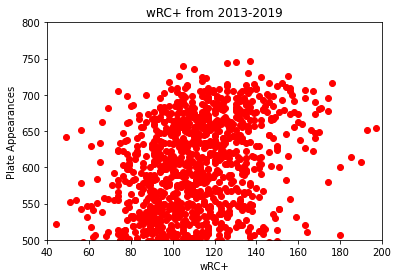

In [ ]:
plt.scatter(df2['wRC+'], df2['PA'], color='r')
plt.title('wRC+ from 2013-2019')
plt.xlim([40,200])
plt.ylim([500,800])
plt.xlabel('wRC+')
plt.ylabel('Plate Appearances')
plt.show();

In [ ]:
# sns.scatterplot(df2['wRC+'])

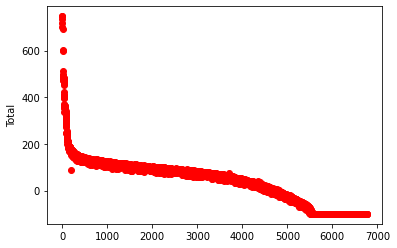

In [ ]:
plt.plot(df2['wRC+'], 'ro')
plt.ylabel('Total')
plt.show()

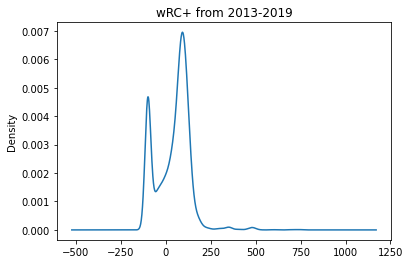

In [ ]:
df3 = df2['wRC+']

CI = confidence_interval(df3)

df3.plot.density()
plt.title('wRC+ from 2013-2019')
# plt.axvline(x=CI[1], color='red')
# plt.axvline(x=CI[0], color='black')
# plt.axvline(x=CI[2], color='red');
plt.show();

In [ ]:
df3.mean()

41.947671840354765